<a href="https://colab.research.google.com/github/gitmystuff/DTSC5810/blob/main/Week_07-Predictive_Analytics/Logistic%20Regression%20with%20Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Titanic

* https://towardsdatascience.com/powerful-one-liners-in-pandas-every-data-scientist-should-know-737e721b81b6
* https://www.quora.com/What-kind-of-statistics-should-be-learned-to-make-a-good-data-analyst
* https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1
* https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f
* https://www.encyclopedia-titanica.org/
* https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html
* https://github.com/davidjamesknight/SQLite_databases_for_learning_data_science
* the Titanic dataset is from https://data.world/datasets/titanic-dataset
* https://www.youtube.com/watch?v=ZPy-wg6ykJ0

### The Crystal Palace

The Great Exhibition of 1851

https://en.wikipedia.org/wiki/The_Crystal_Palace

### The Titanic - The Crystal Palace of the Sea

https://www.reddit.com/r/titanic/comments/mp1t32/this_is_one_of_my_favorite_shots_of_the_titanic/

### Ship Comparisons

https://www.hmy.com/timeline-worlds-largest-passenger-ships/

### Sources

On that fatal night in 1912, the world’s largest moving object disappeared beneath the waters of the North Atlantic in less than three hours. Why was the ship sailing through waters well known to be a "mass of floating ice"? Why were there too few lifeboats? Why were a third of the survivors crew members? Based on the sensational evidence of the U.S. Senate hearings, eyewitness accounts, and the results of the 1985 Woods Hole expedition that photographed the ship, this electrifying account vividly re-creates the vessel’s last desperate hours afloat and fully addresses the questions that have continued to haunt the tragedy of the Titanic.

**The Titanic: Disaster of the Century** by Wyn Craig Wade

Everyone from suffragists to their opponents; radicals, reformers, and capitalists; critics of technology and modern life; racists and xenophobes and champions of racial and ethnic equality; editorial writers and folk singers, preachers and poets found moral and cultural lessons in the sinking of the Titanic.

In a new edition that both commemorates the one hundredth anniversary of the disaster and elaborates, in a revised afterword, on the ship's continued impact on the public imagination (evidenced by the Titanic mania evoked by James Cameron's 1997 film), Steven Biel explores the Titanic in all its complexity and contradictions.

**Down with the Old Canoe: A Cultural History of the Titanic Disaster** by Steven Biel (Author)

Online Sources
* https://www.encyclopedia-titanica.org/
* https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html

### Early 1900s

* Ultranationalism
* Race Problem
* Equal Rights Problem
* Labor Problem
* Immigration Problem
* Rumors of War
* Spanish Flu

In [1]:
# get database
!wget https://github.com/gitmystuff/Datasets/raw/main/titanic.db

--2024-06-28 15:53:41--  https://github.com/gitmystuff/Datasets/raw/main/titanic.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gitmystuff/Datasets/main/titanic.db [following]
--2024-06-28 15:53:41--  https://raw.githubusercontent.com/gitmystuff/Datasets/main/titanic.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118784 (116K) [application/octet-stream]
Saving to: ‘titanic.db’

titanic.db          100%[===================>] 116.00K  --.-KB/s    in 0.02s   

2024-06-28 15:53:41 (4.61 MB/s) - ‘titanic.db’ saved [118784/118784]



In [2]:
import sqlite3
import pandas as pd

db_connection = sqlite3.connect('titanic.db')

titanic = pd.read_sql_query('SELECT * FROM titanic', db_connection)
# titanic = titanic.sample(frac=1, axis=1).reset_index(drop=True)
titanic.drop('id', axis=1, inplace=True)
# titanic.to_csv('titanic_with_names.csv', index=False)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# print shape and info
print(titanic.shape)
print(titanic.info())

(1310, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


## Data Prep

In [4]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

### Data Types

In [5]:
# numerical: discrete vs continuous
discrete = [var for var in titanic.columns if titanic[var].dtype !=
            'O' and var != 'survived' and titanic[var].nunique() < 10]

continuous = [var for var in titanic.columns if titanic[var].dtype !=
              'O' and var != 'survived' and var not in discrete]

# categorical
categorical = [var for var in titanic.columns if titanic[var].dtype == 'O']

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 4 discrete variables
There are 3 continuous variables
There are 6 categorical variables


In [6]:
print('discrete:', discrete)
print('continuous:', continuous)
print('categorical:', categorical)

discrete: ['pclass', 'sex', 'sibsp', 'parch']
continuous: ['age', 'fare', 'body']
categorical: ['name', 'ticket', 'cabin', 'embarked', 'boat', 'home_dest']


### Special Null Values

In [7]:
# find nulls
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home_dest     565
dtype: int64

In [8]:
# find index of blank row
titanic.index[titanic.isnull().all(1)]

Index([1309], dtype='int64')

In [9]:
titanic.loc[1309]

pclass        NaN
survived      NaN
name         None
sex           NaN
age           NaN
sibsp         NaN
parch         NaN
ticket       None
fare          NaN
cabin        None
embarked     None
boat         None
body          NaN
home_dest    None
Name: 1309, dtype: object

In [10]:
# delete row by index
titanic.drop(index=1309, inplace=True)

In [11]:
# find nulls
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [12]:
# observation for missing fare
titanic[titanic.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1225,3.0,0.0,"Storey, Mr. Thomas",0.0,60.5,0.0,0.0,3701,NaN,None,S,None,261.0,None


In [13]:
# average 3rd class fare
titanic[titanic.pclass==3.0].fare.mean()

13.302888700564973

In [14]:
# impute missing fare
titanic.fare.fillna(13, inplace=True)

In [15]:
# observation for missing embarked
titanic[titanic.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
168,1.0,1.0,"Icard, Miss. Amelie",1.0,38.0,0.0,0.0,113572,80.0,B28,None,6,NaN,None
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [16]:
titanic[titanic['name'].str.contains('Stone', na=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
275,1.0,1.0,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1.0,40.0,1.0,1.0,16966,134.5,E34,C,3,NaN,"Tuxedo Park, NY"
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [17]:
titanic[titanic['cabin'] == 'B28']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
168,1.0,1.0,"Icard, Miss. Amelie",1.0,38.0,0.0,0.0,113572,80.0,B28,None,6,NaN,None
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0.0,0.0,113572,80.0,B28,None,6,NaN,"Cincinatti, OH"


In [18]:
# https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
titanic.embarked.fillna('S', inplace=True)

In [19]:
# recheck null count
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home_dest     564
dtype: int64

In [20]:
# work on replacing age
print('Mr.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Mr\.')].shape)
print('Dr.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Dr\.')].shape)
print('Ms.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Ms\.')].shape)
print('Mrs.', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Mrs\.')].shape)
print('Miss', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Miss\.')].shape)
print('Master', titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Master')].shape)

Mr. (176, 14)
Dr. (1, 14)
Ms. (1, 14)
Mrs. (27, 14)
Miss (50, 14)
Master (8, 14)


In [21]:
# lookup Titanic Wikipedia
titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Dr\.')] # 46

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",0.0,NaN,0.0,0.0,112379,39.6,None,C,None,NaN,"Philadelphia, PA"


In [22]:
titanic.at[40, 'age'] = 46

In [23]:
# lookup Titanic Wikipedia
titanic[(pd.isna(titanic['age'])) & titanic['name'].str.contains('Ms\.')] # 21

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1076,3.0,0.0,"O'Donoghue, Ms. Bridget",1.0,NaN,0.0,0.0,364856,7.75,None,Q,None,NaN,None


In [24]:
titanic.at[1076, 'age'] = 21

In [25]:
cond1 = titanic['name'].str.contains('Master')
titanic.loc[cond1,'age'] = titanic.loc[cond1,'age'].fillna(titanic.loc[cond1,'age'].mean())

cond2 = titanic['name'].str.contains('Miss\.')
titanic.loc[cond2,'age'] = titanic.loc[cond2,'age'].fillna(titanic.loc[cond2,'age'].mean())

cond3 = titanic['name'].str.contains('Mrs\.')
titanic.loc[cond3,'age'] = titanic.loc[cond3,'age'].fillna(titanic.loc[cond3,'age'].mean())

cond4 = titanic['name'].str.contains('Mr\.')
titanic.loc[cond4,'age'] = titanic.loc[cond4,'age'].fillna(titanic.loc[cond4,'age'].mean())

In [26]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home_dest     564
dtype: int64

In [27]:
# reducing labels
import re

def cat_home(r):
    text = str(r['home_dest']).strip()
    if bool(re.search('[A-Z]{2}$', text[-2:])):
        return 'North America'
    elif text == 'nan':
        return 'Missing'
    else:
        return 'Not North America'

titanic['cat_home'] = titanic.apply(cat_home, axis=1)
titanic.drop(['home_dest'], axis=1, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   float64
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1309 non-null   object 
 11  boat      486 non-null    object 
 12  body      121 non-null    float64
 13  cat_home  1309 non-null   object 
dtypes: float64(8), object(6)
memory usage: 143.3+ KB


In [28]:
# create adult male feature
import pandas as pd

def is_adult_male(row):
    if pd.isna(row['age']):
        return None
    if row['age'] > 15 and row['age'] < 81 and row['sex'] == 0:
        return 1
    else:
        return 0

titanic['adult_male'] = titanic.apply(is_adult_male, axis=1)
titanic['adult_male'].value_counts(dropna=False)

adult_male
1    776
0    533
Name: count, dtype: int64

In [29]:
# create embark_town
import pandas as pd

def set_embark_town(row):
    if pd.isna(row['age']):
        return None
    elif row['embarked'] == 'C':
        return 'Cherbourg'
    elif row['embarked'] == 'S':
        return 'Southampton'
    elif row['embarked'] == 'Q':
        return 'Queenstown'
    else:
        return None

titanic['embark_town'] = titanic.apply(set_embark_town, axis=1)
titanic['embark_town'].value_counts(dropna=False)

embark_town
Southampton    916
Cherbourg      270
Queenstown     123
Name: count, dtype: int64

### Describe Include Object

In [30]:
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body,adult_male
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,121.000000,1309.000000
mean,2.294882,0.381971,0.355997,29.893398,0.498854,0.385027,33.279975,160.809917,0.592819
std,0.837836,0.486055,0.478997,13.198092,1.041658,0.865560,51.741920,97.696922,0.491497
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,21.774207,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,0.000000,30.000000,0.000000,0.000000,14.454200,155.000000,1.000000
75%,3.000000,1.000000,1.000000,36.000000,1.000000,0.000000,31.275000,256.000000,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [31]:
titanic.describe(include='object')

,name,ticket,cabin,embarked,boat,cat_home,embark_town
count,1309,1309,295,1309,486,1309,1309
unique,1307,929,186,3,27,2,3
top,"Connolly, Miss. Kate",CA. 2343,C23 C25 C27,S,13,Not North America,Southampton
freq,2,11,6,916,39,744,916


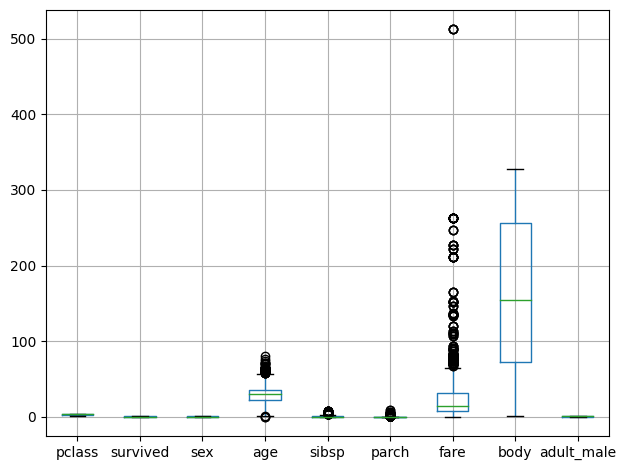

In [32]:
import matplotlib.pyplot as plt

titanic.boxplot()
plt.tight_layout();

### Handling Outliers

https://www.projectpro.io/recipes/deal-with-outliers-in-python

* Drop
* Mark
* Rescale

### Scalers

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

* from sklearn.preprocessing import MinMaxScaler
* from sklearn.preprocessing import minmax_scale
* from sklearn.preprocessing import MaxAbsScaler
* from sklearn.preprocessing import StandardScaler
* from sklearn.preprocessing import RobustScaler
* from sklearn.preprocessing import Normalizer
* from sklearn.preprocessing import QuantileTransformer
* from sklearn.preprocessing import PowerTransformer

### Drop Features

In [33]:
# start list of features we won't use for analysis
drop_features = ['name', 'ticket', 'boat', 'body', 'cabin']


### Crosstab

ask Gemini what a crosstab is

In [34]:
pd.crosstab(titanic['cat_home'], titanic['pclass'])

pclass,1.0,2.0,3.0
cat_home,,,
North America,234,171,160
Not North America,89,106,549


### Pivot Table

ask Gemini what a pivot table is

In [35]:
pd.pivot_table(titanic,
               index=['cat_home'],
               columns=['pclass'],
               aggfunc='size',
               fill_value=0)

pclass,1.0,2.0,3.0
cat_home,,,
North America,234,171,160
Not North America,89,106,549


### Groupbys

https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd

In [36]:
# groupby data views
titanic.groupby(['pclass', 'embark_town']).size()

pclass  embark_town
1.0     Cherbourg      141
        Queenstown       3
        Southampton    179
2.0     Cherbourg       28
        Queenstown       7
        Southampton    242
3.0     Cherbourg      101
        Queenstown     113
        Southampton    495
dtype: int64

In [37]:
# using aggregates
titanic.groupby('embark_town')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
embark_town,,,,
Cherbourg,4.0125,512.3292,62.336267,28.51875
Queenstown,6.7500,90.0000,12.409012,7.75000
Southampton,0.0000,263.0000,27.517889,13.00000


In [38]:
# using aggregates
titanic.groupby('sex')['fare'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
sex,,,,
0.0,0.00,512.3292,26.138996,12.275
1.0,6.75,512.3292,46.198097,23.000


In [39]:
drop_features.extend(['fare', 'embark_town'])
titanic.drop(drop_features, axis=1, inplace=True)

## PrepPy

* identify_consts
* identify_quasi_consts
* check_row_duplicates
* check_col_duplicates
* do_OHE
* handle_missing_values
* handle_standard_scaler
* handle_minmax_scaler
* handle_outliers

In [40]:
! git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 52 (delta 23), reused 19 (delta 8), pack-reused 0
Receiving objects: 100% (52/52), 21.79 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [41]:
from preppy.version import __version__
import preppy.utils as utils

print(__version__)

PrepPy Version: 0.1.0


In [42]:
consts = utils.functions.identify_consts(titanic)
print(consts)

[]


In [43]:
quasi_consts = utils.functions.identify_quasi_consts(titanic)
print(quasi_consts)

[]


In [44]:
utils.functions.check_row_duplicates(titanic)

561

In [45]:
duplicate_features = utils.functions.check_col_duplicates(titanic)
print(duplicate_features)

[]


In [46]:
titanic = utils.functions.do_OHE(titanic)

In [47]:
titanic = utils.functions.handle_missing_values(titanic)

In [48]:
print(titanic.shape)
titanic.dropna(inplace=True)
print(titanic.shape)

(1309, 10)
(1309, 10)


## Train Test Split

In [49]:
# split the titanic data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                titanic.drop(['survived'], axis=1),
                                titanic['survived'],
                                test_size=0.25,
                                random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(981, 9)
(328, 9)
      pclass  sex   age  sibsp  parch  cat_home  adult_male  embarked_Q  \
1139     3.0  0.0  38.0    0.0    0.0         0           1         0.0   
678      3.0  0.0   6.0    1.0    1.0         1           0         0.0   
290      1.0  0.0  52.0    1.0    1.0         1           1         0.0   
285      1.0  0.0  67.0    1.0    0.0         1           1         0.0   
1157     3.0  0.0  18.0    1.0    1.0         0           1         0.0   

      embarked_S  
1139         1.0  
678          0.0  
290          1.0  
285          1.0  
1157         1.0  


## Correlation

In [50]:
# show corr table
X_train._get_numeric_data().corr(method='pearson')

,pclass,sex,age,sibsp,parch,cat_home,adult_male,embarked_Q,embarked_S
pclass,1.000000,-0.111668,-0.351403,0.062052,0.043457,-0.420057,0.062306,0.232813,0.077687
sex,-0.111668,1.000000,-0.083373,0.120309,0.228100,0.113179,-0.895494,0.074203,-0.113776
age,-0.351403,-0.083373,1.000000,-0.234017,-0.141657,0.083075,0.267312,-0.035625,-0.027274
sibsp,0.062052,0.120309,-0.234017,1.000000,0.360851,0.094428,-0.272777,-0.056447,0.083838
parch,0.043457,0.228100,-0.141657,0.360851,1.000000,0.147616,-0.327840,-0.092220,0.072259
cat_home,-0.420057,0.113179,0.083075,0.094428,0.147616,1.000000,-0.123063,-0.089575,0.025265
adult_male,0.062306,-0.895494,0.267312,-0.272777,-0.327840,-0.123063,1.000000,-0.065684,0.105456
embarked_Q,0.232813,0.074203,-0.035625,-0.056447,-0.092220,-0.089575,-0.065684,1.000000,-0.502994
embarked_S,0.077687,-0.113776,-0.027274,0.083838,0.072259,0.025265,0.105456,-0.502994,1.000000


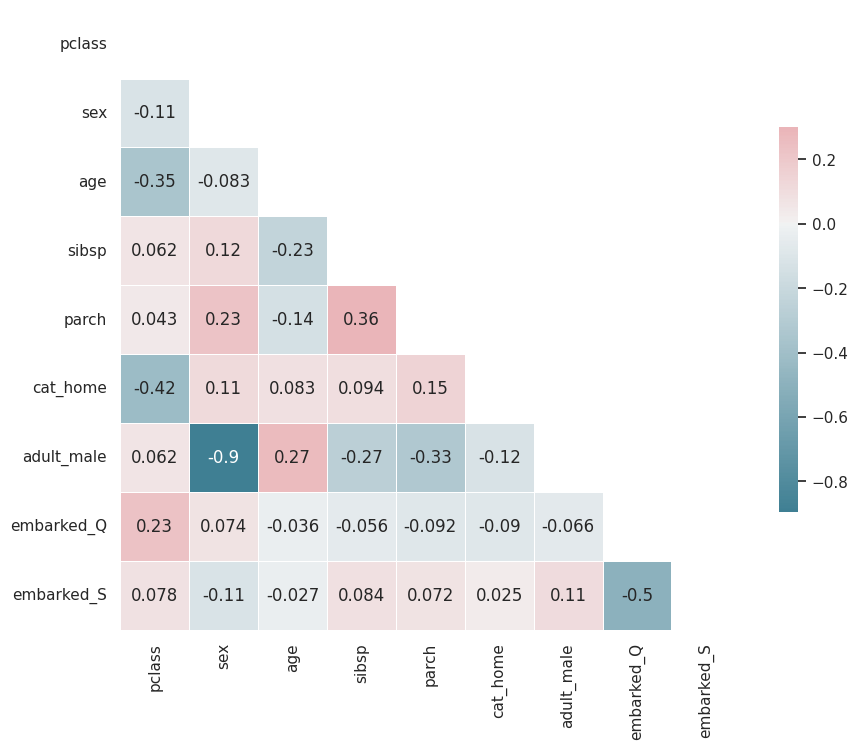

In [51]:
# feature on feature
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train._get_numeric_data().corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Variance Inflation Factor

* Measures how much one predictor is influenced, or inflated, by the presence, or correlation, of another predictor
* Quick measure of the contribution of a predictor to the standard error, the standard deviation of a sample, in regression

https://www.statisticshowto.com/variance-inflation-factor/

In [52]:
# vif
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_train = X_train._get_numeric_data()
vif_data = [variance_inflation_factor(vif_train.values, i) for i in range(len(vif_train.columns))]

d = {'feature': vif_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,pclass,8.955030
1,sex,6.210861
2,age,8.106159
3,sibsp,1.520675
4,parch,1.514983
5,cat_home,1.976934
6,adult_male,12.200892
7,embarked_Q,1.680863
8,embarked_S,4.744546


### Mutual Information

* Measures the mutual dependence on two variables
* Persons r is linear where as MI measures non-linear relationships
* How much information can be extracted from one variable by observing another variable

Text(0, 0.5, 'Mutual Information')

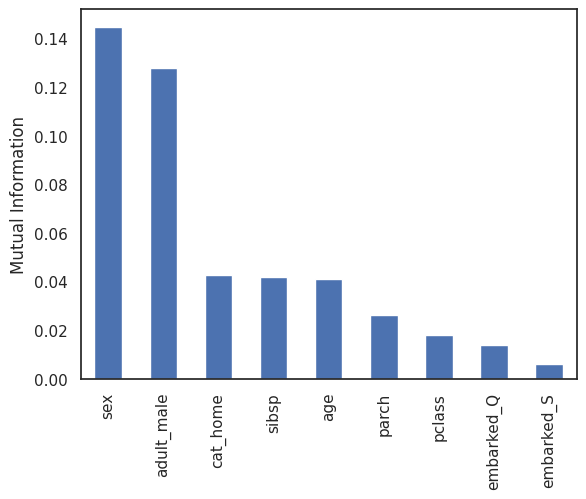

In [53]:
# obtain the mutual information values and select features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

mi_train = X_train._get_numeric_data()

mi = mutual_info_regression(mi_train, y_train)
mi = pd.Series(mi)
mi.index = mi_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information')

In [54]:
# engineer discrete variables
titanic[discrete] = titanic[discrete].astype('O')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   object 
 1   survived    1309 non-null   float64
 2   sex         1309 non-null   object 
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   object 
 5   parch       1309 non-null   object 
 6   cat_home    1309 non-null   int64  
 7   adult_male  1309 non-null   int64  
 8   embarked_Q  1309 non-null   float64
 9   embarked_S  1309 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 102.4+ KB


## Feature Selection

* https://towardsdatascience.com/the-power-of-ridge-regression-4281852a64d6
* https://www.datasciencesmachinelearning.com/2019/10/feature-selection-filter-method-wrapper.html

* Filter Methods: Uses metrics such as correlation
    * Correlation
    * Chi Square
    * ANOVA
    * Information Gain
* Wrapper Methods: Uses algorithms and stats to find optimal features
    * Forward Selection
    * Backward Selection
    * Stepwise Selection
* Embedded Methods: Selects features during model building
    * Lasso
    * Ridge
    * Elastic Net

### Variance Threshold

* Feature selector that removes all low-variance features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [55]:
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.2)
selections.fit(X_train)
vt_keepers = X_train.columns.values[selections.get_support()]
print(vt_keepers)

['pclass' 'sex' 'age' 'sibsp' 'parch' 'cat_home' 'adult_male' 'embarked_S']


### Select K Best

* Select features according to the k highest scores
* Chi-squared stats of non-negative features for classification tasks

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

selections = SelectKBest(chi2, k=6)
selections.fit(X_train, y_train)
kb_keepers = X_train.columns.values[selections.get_support()]
print(kb_keepers)

['pclass' 'sex' 'age' 'parch' 'cat_home' 'adult_male']


### Select From Model

* Meta-transformer for selecting features based on importance weights
* Feature weight importance
* Uses estimators such as AdaBoost, Logistic Regression, RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selections = SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(
                    X_train, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['pclass' 'sex' 'adult_male']


### Recursive Feature Elimination


* Feature ranking with recursive feature elimination
* Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

selections = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5).fit(
                    X_train, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['pclass' 'sex' 'cat_home' 'adult_male' 'embarked_S']


## The Model

### Check for Balanced Dataset

survived
0.0    0.637105
1.0    0.362895
Name: proportion, dtype: float64


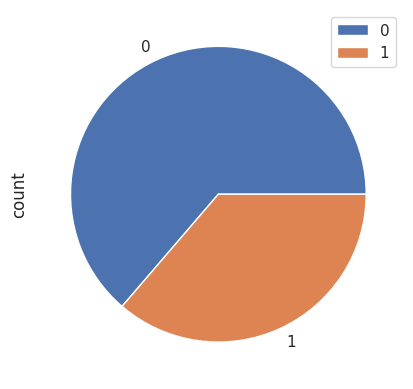

In [59]:
# see if the titanic survived (target) is balanced
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.pie(labels=['0', '1']).legend();

### ROC AUC Score

The ROC AUC score is the area under the ROC curve. It sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds. The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.

https://www.evidentlyai.com/classification-metrics/explain-roc-curve

In [60]:
# we can now build our titanic classification model
# is it balanced? no, use class_weight='balanced'
# is it a small dataset? yes, use liblinear for solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

rocauc_score = roc_auc_score(y_test, predictions)

print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')

# what is our accuracy? (tn + tp / (total length of our data))
print(f'Test Accuracy (tn + tp / (total length of our data)): {(tn + tp) / (tn + fp + fn + tp)}')
print(f'Roc-Auc Score: {rocauc_score}')

print()
print(confusion_matrix(y_test, predictions))

Training Score: 0.8063200815494393
Test Score: 0.7926829268292683
Test Accuracy (tn + tp / (total length of our data)): 0.7926829268292683
Roc-Auc Score: 0.7880434782608695

[[152  32]
 [ 36 108]]


In [61]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'cat_home', 'adult_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [62]:
# what features get the highest accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, classification_report

# vt_keepers = np.array(['pclass' 'sex' 'age' 'sibsp' 'parch' 'embarked_S' 'cat_home_1'])
mi_keepers = np.array(['sex', 'pclass', 'parch', 'age'])
b3_keepers = np.array(['sex', 'age', 'pclass'])
# mt_keepers = np.array(['pclass' 'sex'])
cw_keepers = np.array(['sex', 'pclass'])
pc_keepers = np.array(['pclass'])
sx_keepers = np.array(['sex'])
am_keepers = np.array(['adult_male'])

k_list = {'variance threshold': vt_keepers,
          'k best': kb_keepers,
          'recursive feature': rf_keepers,
          'mututal information': mi_keepers,
          'big 3': b3_keepers,
          'select from model': mt_keepers,
          'corrwith': cw_keepers,
          'pclass': pc_keepers,
          'sex': sx_keepers,
          'adult male': am_keepers}

# keepers = mi_keepers.tolist()

train_scores= {}
test_scores = {}

for k, v in k_list.items():
    keepers = v.tolist()

    model = LogisticRegression(class_weight='balanced', solver='liblinear')
    model.fit(X_train[keepers], y_train)
    # yhat = model.predict(X_test[keepers])

    print(f'{k}{keepers} Training Score: {model.score(X_train[keepers], y_train)}')
    print(f'{k}{keepers} Test Score: {model.score(X_test[keepers], y_test)}')
    train_scores[k] = model.score(X_train[keepers], y_train)
    test_scores[k] = model.score(X_test[keepers], y_test)
    print()

print(max(train_scores, key=train_scores.get))
print(max(test_scores, key=test_scores.get))

variance threshold['pclass', 'sex', 'age', 'sibsp', 'parch', 'cat_home', 'adult_male', 'embarked_S'] Training Score: 0.8012232415902141
variance threshold['pclass', 'sex', 'age', 'sibsp', 'parch', 'cat_home', 'adult_male', 'embarked_S'] Test Score: 0.8048780487804879

k best['pclass', 'sex', 'age', 'parch', 'cat_home', 'adult_male'] Training Score: 0.7930682976554536
k best['pclass', 'sex', 'age', 'parch', 'cat_home', 'adult_male'] Test Score: 0.801829268292683

recursive feature['pclass', 'sex', 'cat_home', 'adult_male', 'embarked_S'] Training Score: 0.7798165137614679
recursive feature['pclass', 'sex', 'cat_home', 'adult_male', 'embarked_S'] Test Score: 0.7682926829268293

mututal information['sex', 'pclass', 'parch', 'age'] Training Score: 0.7675840978593272
mututal information['sex', 'pclass', 'parch', 'age'] Test Score: 0.7957317073170732

big 3['sex', 'age', 'pclass'] Training Score: 0.7604485219164119
big 3['sex', 'age', 'pclass'] Test Score: 0.7957317073170732

select from mode

### Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

In [63]:
# Confusion Matrix

print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent')
print('''
                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP
''')

Confusion Matrix
[[152  32]
 [ 36 108]]

Here is what the numbers represent

                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP



### The Classification Report

The titanic isn't as balanced as they could be but to appreciate the implications of an imbalanced dataset, consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This presents the Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [64]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       184
         1.0       0.77      0.75      0.76       144

    accuracy                           0.79       328
   macro avg       0.79      0.79      0.79       328
weighted avg       0.79      0.79      0.79       328



In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print('precision 0:', round(tn/(tn+fn), 2))
print('precision 1:', round(tp/(tp+fp), 2))
print('recall 0:', round(tn/(tn+fp), 2))
print('recall 1:', round(tp/(tp+fn), 2))

152 32 36 108
precision 0: 0.81
precision 1: 0.77
recall 0: 0.83
recall 1: 0.75


We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

### Precision / Recall

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become useful metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GM10sFuFBAbhwBt2scuP1g.png' alt='precision recall tradeoff' />

https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140

* Precision - What did you correctly predict?
* Recall - What did you correctly identify from the acutal data?
* F1 (harmonic mean) - (2x(RecallxPrecision))/(Recall+Precision)

## Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
  